<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments-Spring-2019/blob/master/Assignment%202/120_epochs_Model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading CIFAR-10 dataset

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
import keras


#creating train,validate and test sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.20,stratify=train_labels)#, random_state=42)

print(train_images.shape)
print(X_train.shape)
print(X_val.shape)
print(test_images.shape)


#train_images=np.array(train_images)
#x_train=train_images[0:40000]
#x_val=train_images[40000:]

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)



num_classes=10
# Convert class vectors to binary class matrices.
test_labels = keras.utils.to_categorical(test_labels, num_classes)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val=keras.utils.to_categorical(y_val, num_classes)
print(y_val.shape)




Using TensorFlow backend.


(50000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 10)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Using real-time data augmentation.
Instructions for updating:
Use tf.cast instead.
Epoch 1/120
625/625 [==============================] - 39s 62ms/step - loss: 2.0270 - acc: 0.3905 - val_loss: 1.5513 - val_acc: 0.5184
Epoch 2/120
625/625 [==============================] - 32s 50ms/step - loss: 1.4095 - acc: 0.5548 - val_loss: 1.2568 - val_acc: 0.6129
Epoch 3/120
625/625 [==============================] - 35s 56ms/step - loss: 1.1958 - acc: 0.6230 - val_loss: 1.0636 - val_acc: 0.6687
Epoch 4/120
625/625 [==============================] - 33s 53ms/step - loss: 1.0757 - acc: 0.6610 - val_loss: 0.9480 - val_acc: 0.7059
Epoch 5/120
625/625 [==============================] - 32s 52ms/step - loss: 0.9841 - acc: 0.6903 - val_loss: 0.8819 - val_acc: 0.7331
Epoch 6/120
625/625 [==============================] - 

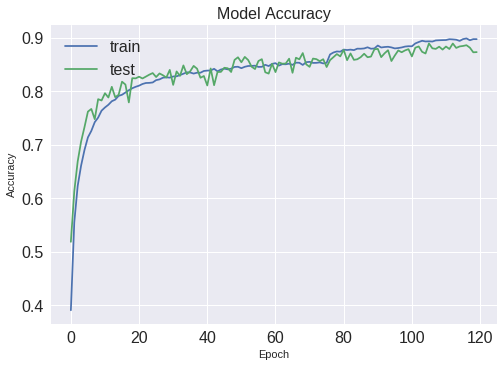

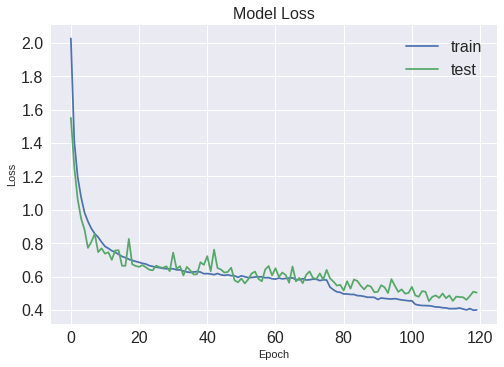

Confusion Matrix


[[917   7  17   1   3   0   8   2  38   7]
 [  4 959   1   0   0   0   2   0  10  24]
 [ 36   1 846   6  23  12  61   9   2   4]
 [ 27   8  40 648  37  56 121  21  25  17]
 [ 15   1  32   5 853   5  63  24   1   1]
 [  9   5  37  67  23 727  76  43   3  10]
 [  6   3  10   4   4   0 968   1   2   2]
 [ 15   0   7   6  19   5  22 920   3   3]
 [ 26   7   1   0   0   0   3   0 954   9]
 [ 13  43   2   0   1   0   1   1  19 920]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1068
           1       0.96      0.93      0.94      1034
           2       0.85      0.85      0.85       993
           3       0.65      0.88      0.75       737
           4       0.85      0.89      0.87       963
           5       0.73      0.90      0.81       805
           6       0.97      0.73      0.83      1325
           7       0.92      0.90      0.91      1021
           8       0.95      0.90      0.93      1057
         

In [2]:
batch_size = 64
epochs = 120
data_augmentation = True
num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
#model_name = 'keras_cifar10_trained_model.h5'



from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler


#Model with 2 conv blocks and 4 conv layers with 2 fc layers and dropout
def model1():
  

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model


#increased number of blocks/layers
def model2():
  

  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model

#no dropout
def model3():
  

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model



#more filters , rest same as model 1
def model4():
  

  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model

#with batch normalization, and weight regulariser
def model5():
  
  weight_decay = 1e-4
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  
  return model
  
 
#to vary learning during training
def lr_schedule(epoch):
  lrate = 0.001
  if epoch > 75:
      lrate = 0.0005
  if epoch > 100:
      lrate = 0.0003
  return lrate
  


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# using SGD
sgd=keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

#using ADAM
Adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


#using adgrad
adagrad=keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)


#use mse as loss as well categorical_crossentropy


#Calling model4
model=model5()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#finding mean and normalizing 
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_val=(X_val-mean)/(std+1e-7)
test_images=(test_images-mean)/(std+1e-7)

# option of data augmentation 
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True,callbacks=[LearningRateScheduler(lr_schedule)])
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
    
    datagen.fit(X_train)

    

    # Fit the model on the batches generated by datagen.flow().
    history=model.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,steps_per_epoch=len(X_train)/batch_size,
                        validation_data=(X_val, y_val),callbacks=[LearningRateScheduler(lr_schedule)])
                        


# Score trained model.
scores = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys(),'\n\n\n')



SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n\n')

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


#finding confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
import os
from keras.models import load_model


y_pred=model.predict(test_images) 
y_pred = [np.argmax(entry) for entry in y_pred]
y_true = [np.argmax(entry) for entry in test_labels]

print('Confusion Matrix\n\n')
print(confusion_matrix(y_true, y_pred))  

print(classification_report(y_pred,y_true))

In [0]:
#Saving the model as an h5 file

good_model='adam_dropout_hold_out.h5'
model.save(good_model)

In [0]:
!ls

sample_data


In [0]:
from google.colab import files

with open(good_model, 'r') as f:
  files.download(good_model)